### Datasets
    - gdsc --> gg
    - ctrp --> cc
### Models
    - lgb
    - nn0
    - nn1

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from load_modules import *
%matplotlib inline
fpath = Path(os.getcwd())
print('Current path:', fpath)

outpath = fpath/'outpath'
os.makedirs(outpath, exist_ok=True)

Current path: /vol/ml/apartin/projects/dr-learning-curves/nbs


## Path to data

In [2]:
fname = 'all_scores.csv'
dpath = Path('../lc.out')
# dirs = sorted(dpath.glob('*'))
dirs = glob(str(dpath/'*'))
print(dirs)

['../lc.out/lc.gdsc.nn_reg0_v2', '../lc.out/lc.gdsc.nn_reg1', '../lc.out/lc.gdsc.nn_reg1.fair', '../lc.out/lc.gdsc.lgb', '../lc.out/lc.ctrp.nn_reg0_v2', '../lc.out/lc.ctrp.nn_reg1.fair', '../lc.out/lc.ctrp.lgb', '../lc.out/lc.ctrp.nn_reg0_v1', '../lc.out/lc.gdsc.nn_reg1.ps_hpo.test_fair', '../lc.out/lc.gdsc.nn_reg0.fair', '../lc.out/lc.ctrp.nn_reg1', '../lc.out/lc.ctrp.nn_reg0.fair', '../lc.out/lc.gdsc.nn_reg0_v1', '../lc.out/lc.gdsc.nn_reg0.ps_hpo.test_fair', '../lc.out/lc.ctrp.nn_reg1.ps_hpo.test_fair', '../lc.out/lc.ctrp.nn_reg0.ps_hpo.test_fair']


In [23]:
# src = 'GDSC'
# nn0_path = dpath/'../lc.out/lc.gdsc.nn_reg0.ps_hpo.test_fair'/fname
# nn1_path = dpath/'../lc.out/lc.gdsc.nn_reg1.ps_hpo.test_fair'/fname
# lgb_path = dpath/'../lc.out/lc.gdsc.lgb'/fname

src = 'CTRP'
nn0_path = dpath/'../lc.out/lc.ctrp.nn_reg0.ps_hpo.test_fair'/fname
nn1_path = dpath/'../lc.out/lc.ctrp.nn_reg1.ps_hpo.test_fair'/fname
lgb_path = dpath/'../lc.out/lc.ctrp.lgb'/fname

## Load data

In [24]:
nn0 = load_data(nn0_path, tr_set='te');
nn1 = load_data(nn1_path, tr_set='te');
lgb = load_data(lgb_path, tr_set='te');

## Raw plots

In [25]:
# Global plotting params
# -------------------------------
met = 'mean_absolute_error'
t_set = 'te'
xtick_scale = 'log2'
ytick_scale = 'log2'
kwargs = {'metric_name': met, 'tr_set': t_set, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'plot_median': True}

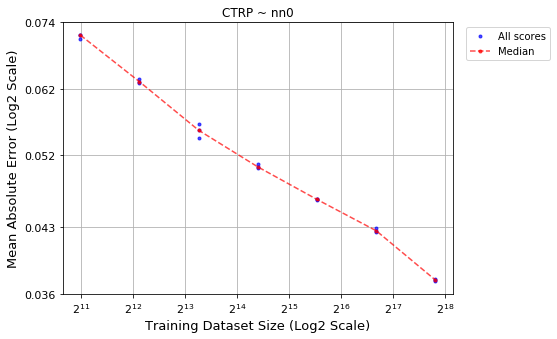

In [26]:
# Plot
# -------------------------------
kwargs.update({'title': f'{src} ~ nn0'})
ax = lc_plots.plot_lc_single_metric(nn0, **kwargs);

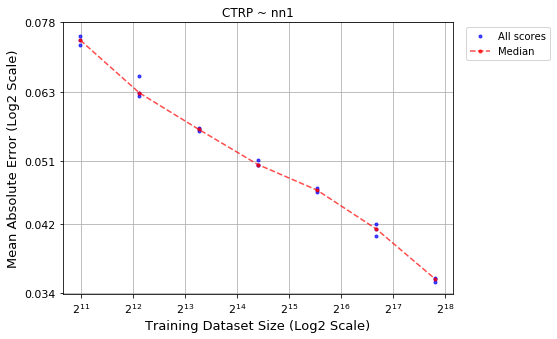

In [27]:
# Plot
# -------------------------------
kwargs.update({'title': f'{src} ~ nn1'})
ax = lc_plots.plot_lc_single_metric(nn1, **kwargs);

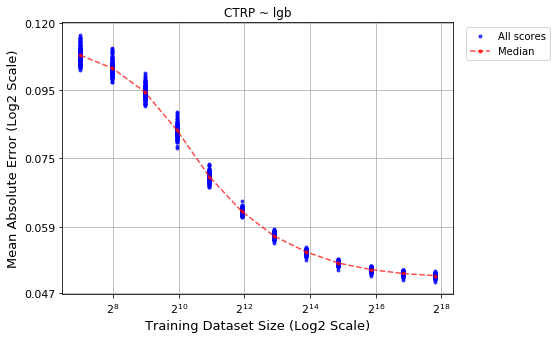

In [28]:
# Plot
# -------------------------------
kwargs.update({'title': f'{src} ~ lgb'})
ax = lc_plots.plot_lc_single_metric(lgb, **kwargs);

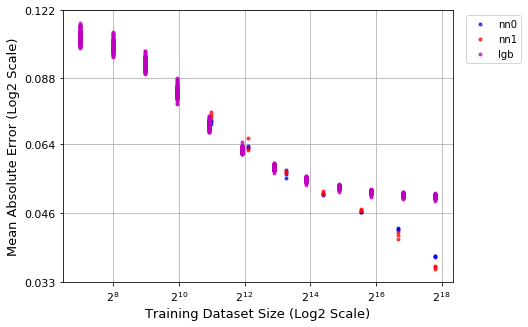

In [29]:
# Plot
# -------------------------------
ax = None
kwargs = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale}

nn0 = nn0[nn0.metric==met].reset_index(drop=True)
ax = lc_plots.plot_lc(x=nn0['tr_size'].values, y=nn0['score'].values, color='b', label='nn0', **kwargs, ax=ax);

nn1 = nn1[nn1.metric==met].reset_index(drop=True)
ax = lc_plots.plot_lc(x=nn1['tr_size'].values, y=nn1['score'].values, color='r', label='nn1', **kwargs, ax=ax);

lgb = lgb[lgb.metric==met].reset_index(drop=True)
ax = lc_plots.plot_lc(x=lgb['tr_size'].values, y=lgb['score'].values, color='m', label='lgb', **kwargs, ax=ax);

In [30]:
nn0[nn0.tr_size == nn0.tr_size.max()].score

6     0.037477
13    0.037354
20    0.037255
Name: score, dtype: float64

In [22]:
nn1[nn1.tr_size == nn1.tr_size.max()].score

6     0.059967
13    0.060406
20    0.059563
Name: score, dtype: float64